EDA-4. Exception Tail: 극단 반응은 노이즈인가

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

fra = pd.read_csv("../data_csv/fra_perfumes.csv", encoding="utf-8")
par = pd.read_csv("../data_csv/parfumo_datos.csv", encoding="utf-8")

In [4]:
length = fra["Description"].fillna("").str.len()
threshold = length.quantile(0.95)
tail = length >= threshold

In [5]:
extreme_words = ["headache","nauseating","overwhelming","disgusting","amazing"]
extreme_flag = fra["Description"].fillna("").str.lower().apply(
    lambda x: sum(w in x for w in extreme_words)
)

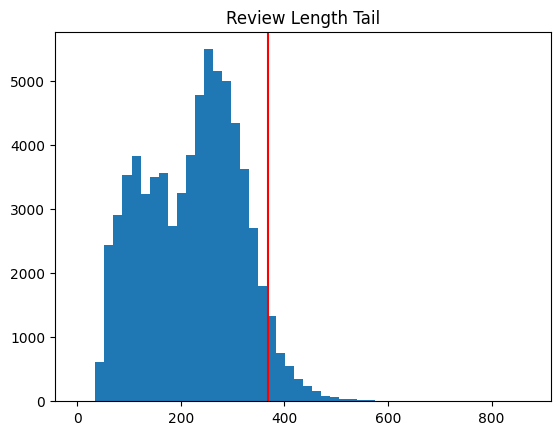

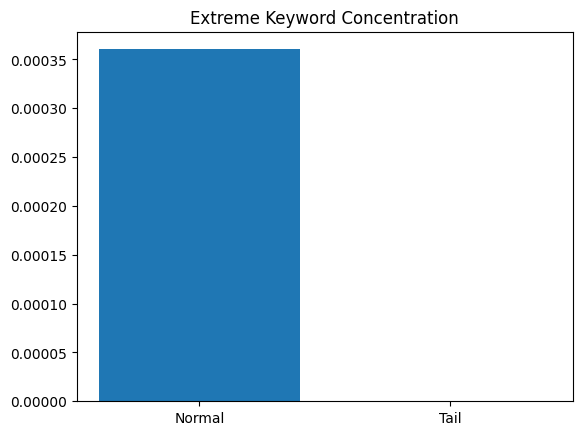

In [6]:
plt.hist(length, bins=50)
plt.axvline(threshold, color="red")
plt.title("Review Length Tail")
plt.show()

plt.bar(
    ["Normal","Tail"],
    [extreme_flag[~tail].mean(), extreme_flag[tail].mean()]
)
plt.title("Extreme Keyword Concentration")
plt.show()

결론: 극단 반응은 평균이 아니라 반복되는 예외 구간에서 발생